In [1]:
#importing depedencies
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Load the data 
car_data = pd.read_csv('./data/car data.csv')

In [3]:
car_data.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_data.shape

(301, 9)

In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# checking the distribution of categorical features
print(car_data['Fuel_Type'].value_counts())
print(car_data['Seller_Type'].value_counts())
print(car_data['Transmission'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [8]:
#enocding categorical features
car_data.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}, 'Seller_Type': {'Individual': 1, 'Dealer': 0}, 'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)

/tmp/ipykernel_57071/3167968749.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}, 'Seller_Type': {'Individual': 1, 'Dealer': 0}, 'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)


In [9]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [10]:
features = ['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

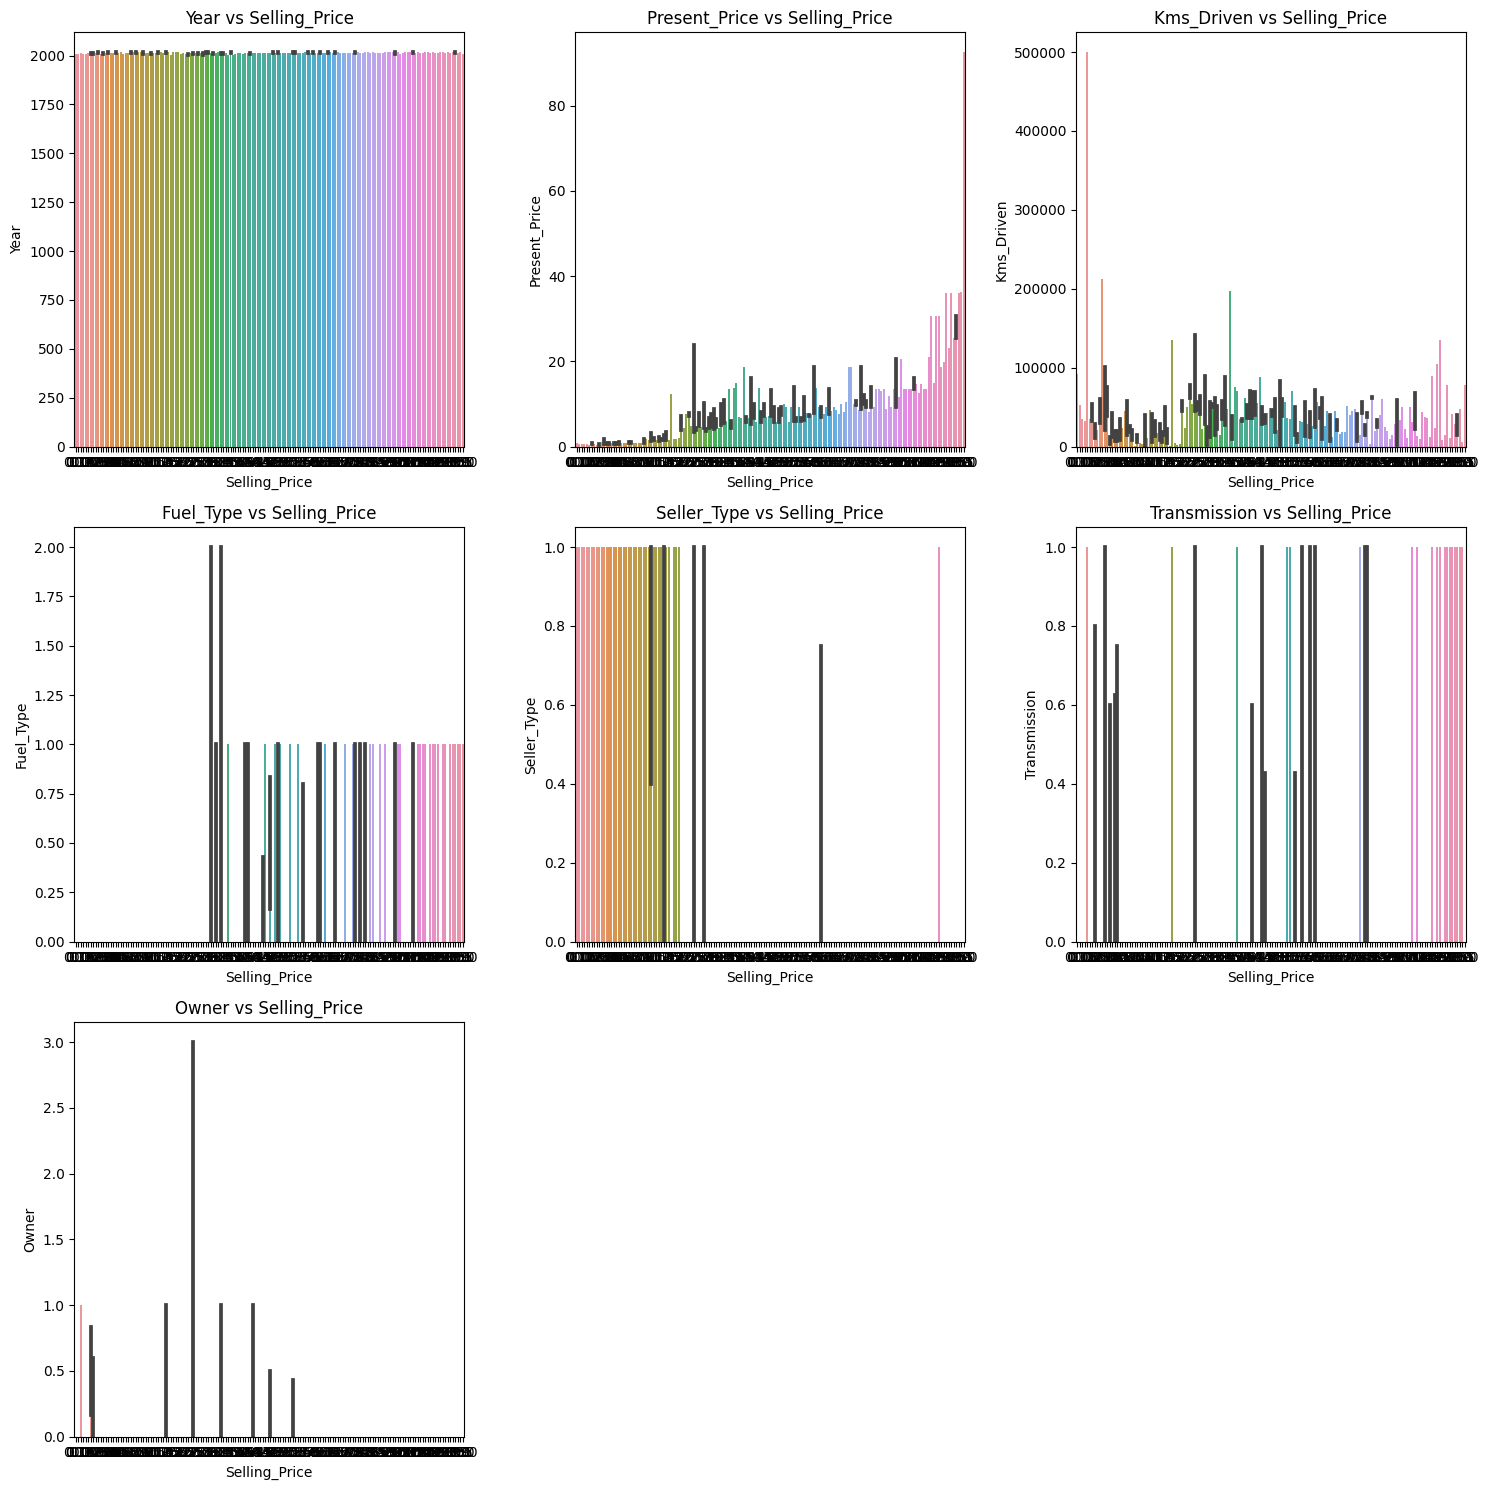

In [11]:
# Number of features to plot
num_features = len(features)

# Define number of columns per row (adjust if needed)
cols = 3  

# Calculate number of required rows
rows = math.ceil(num_features / cols)

# Create subplots grid
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))

# Flatten axes for easy iteration (in case of multiple rows)
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(features):
    sns.barplot(x='Selling_Price', y=feature, data=car_data, ax=axes[i])
    axes[i].set_title(f'{feature} vs Selling_Price')

# Hide any unused subplot axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [12]:
num_features = car_data.drop('Car_Name', axis=1)

In [13]:
num_features.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0


<AxesSubplot: >

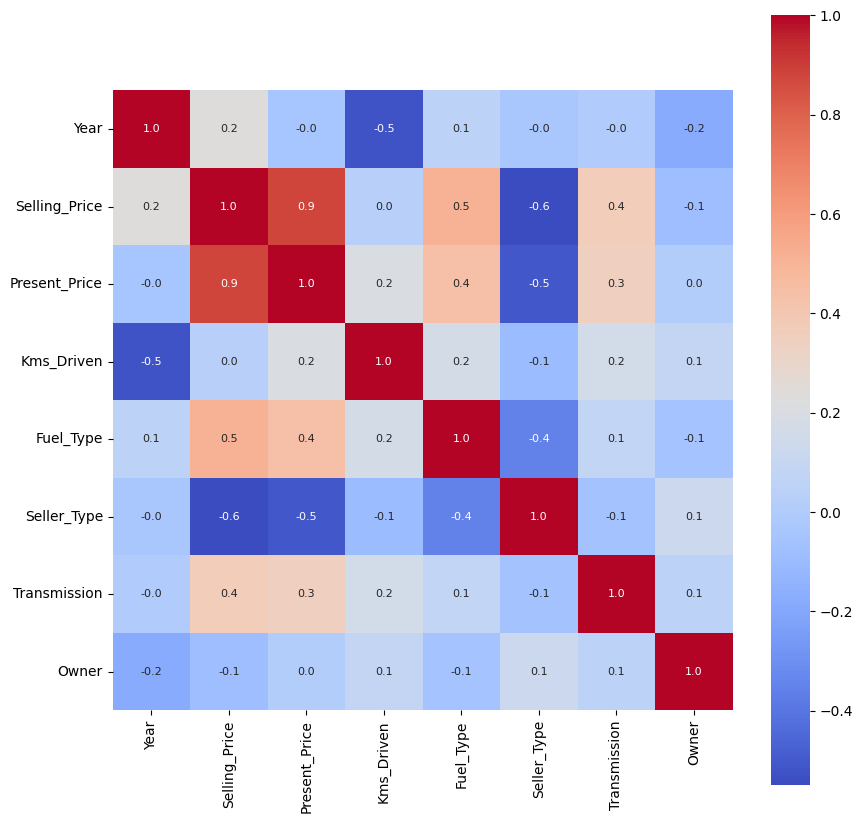

In [14]:
plt.figure(figsize=(10, 10))
sns.heatmap(num_features.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws= {'size': 8 }, cmap="coolwarm")

In [15]:
X = car_data.drop(['Car_Name', 'Selling_Price'], axis=1)

In [16]:
Y = car_data['Selling_Price']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=12)

In [18]:
model = Lasso()

In [19]:
model.fit(X_train, Y_train)

Lasso()

In [20]:
training_data_prediction = model.predict(X_train)

In [21]:
error_score = r2_score(Y_train, training_data_prediction)
print("R squared error in training data: ", error_score)

R squared error in training data:  0.8686835156035603


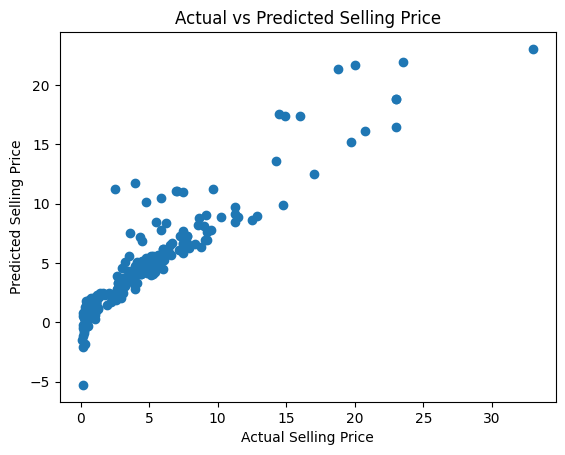

In [23]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.show()

In [24]:
test_data_prediction = model.predict(X_test)

In [25]:
test_error_score = r2_score(Y_test, test_data_prediction)
print("R squared error in test data: ", test_error_score)

R squared error in test data:  0.6789521215959826


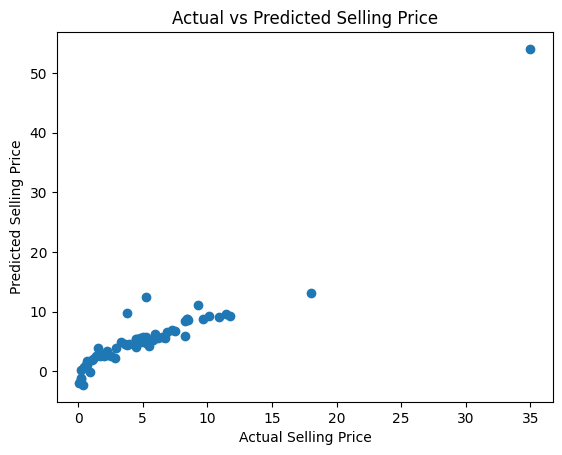

In [26]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.show()